<h1 style="color: #5e9ca0; text-align: center;">Química Analítica</h1>
<h2 style="color: #2e6c80; text-align: center;">Curvas de titulação de NaOH (base forte) com HCl (ácido forte)</h2>
<h3 style="color: #2e6c80; text-align: center;">obs: variando concentração</h2></br>


<h1 style="color: #5e9ca0; text-align: left;">1. Importando bibliotecas</h1>

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.16f}'.format

# mostrando todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# mostrando todas as linhas do dataframe
pd.set_option('display.max_rows', None)

<h1 style="color: #5e9ca0; text-align: left;">2. Dados de concentração</h1>

In [83]:
concentracoes = []
# Concentração inicial do HCl
c_hcl = 0.1

# Qtde de concentrações a serem testadas
for i in np.arange(1, 6):
    concentracoes.append([i,
                          "50,00 mL de NaOH a " + str(f'{np.around(c_hcl/2, 6):.6f}') +
                          " mol/L  com HCl " + str(f'{np.around(c_hcl, 6):.6f}'),
                          np.around(c_hcl, 6),
                          np.around(c_hcl/2, 6)])
    c_hcl = c_hcl * 0.1

# Criando dataframe
df_concentracoes = pd.DataFrame(concentracoes, columns=["Experimento", "Texto", "HCl", "NaOH"])
df_concentracoes

,Experimento,Texto,HCl,NaOH
0,1,"50,00 mL de NaOH a 0.050000 mol/L com HCl 0.1...",0.1000000000000000,0.0500000000000000
1,2,"50,00 mL de NaOH a 0.005000 mol/L com HCl 0.0...",0.0100000000000000,0.0050000000000000
2,3,"50,00 mL de NaOH a 0.000500 mol/L com HCl 0.0...",0.0010000000000000,0.0005000000000000
3,4,"50,00 mL de NaOH a 0.000050 mol/L com HCl 0.0...",0.0001000000000000,0.0000500000000000
4,5,"50,00 mL de NaOH a 0.000005 mol/L com HCl 0.0...",0.0000100000000000,0.0000050000000000


<h1 style="color: #5e9ca0; text-align: left;">3. Dados de titulação</h1>

In [84]:
resultados = []

for index, row in df_concentracoes.iterrows():
    # dados
    texto =  row["Texto"]
    concentracao_HCl = row["HCl"]
    concentracao_NaOH = row["NaOH"]
    volume_NaOH = 0.05 # 50,00 mL = 0,05 L
    pH = 0
    volume_pe = (concentracao_NaOH * volume_NaOH) / concentracao_HCl
    volume_pe = np.around(volume_pe, 5)

    for volume_HCl in np.arange(0, 100.1, 0.5):
        # volume em litros
        volume = volume_HCl / 1000
        volume = np.around(volume, 5)
        volume_HCl = np.around(volume_HCl, 5)
        
        if volume == 0:
            # No ponto inicial (sem adição de HCl)
            pOH = - np.log10(concentracao_NaOH)
            pH = 14 - pOH
            
            # Adiciona em resultados
            resultados.append([texto, np.around(pH, 3), volume_HCl])
        elif volume < volume_pe:
            # Antes do ponte de equivalência
            concentracao_OH = ((concentracao_NaOH * volume_NaOH) - (concentracao_HCl * volume)) / (volume + volume_NaOH)
            pOH = -np.log10(concentracao_OH)
            pH = 14 - pOH
            
            # Adiciona em resultados
            resultados.append([texto, np.around(pH, 3), volume_HCl])
        elif volume == volume_pe:
            # Toda a base foi neutralizada, portanto, o pH é igual a 7,0.
            # Adiciona em resultados
            resultados.append([texto, np.around(7.0, 3), volume_HCl])
        else:
            # Excesso de ácido
            concentracao_H = ((concentracao_HCl * volume) - (concentracao_NaOH * volume_NaOH)) / (volume + volume_NaOH)
            pH = -np.log10(concentracao_H)

            # Adiciona em resultados
            resultados.append([texto, np.around(pH, 3), volume_HCl])

#
# Dataframe de titulação
#
df_dados_titulacao = pd.DataFrame(resultados, columns=["Texto", "pH", "Volume"])

<h1 style="color: #5e9ca0; text-align: left;">4. Gráfico</h1>

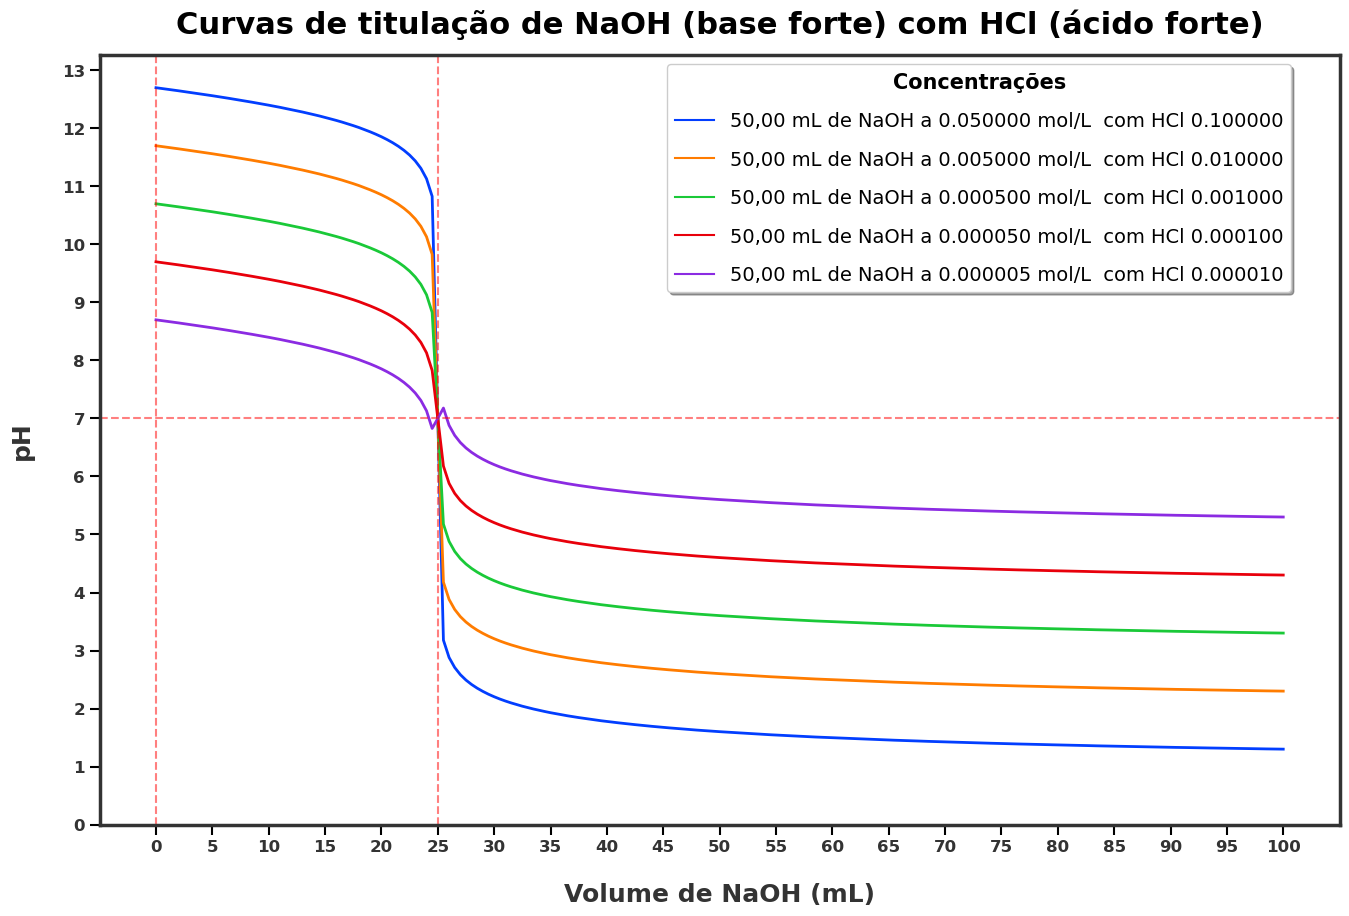

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

sns.lineplot(data = df_dados_titulacao, 
             x = "Volume",
             y = "pH",
             hue="Texto", 
             palette="bright",
             linewidth = 2, markevery=[0.01])

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 105, 5))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(0, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 12, weight = 'bold', color = '0.2')

# definição geral dos ticks do eixo x
plt.xticks(size = 12, weight = 'bold', color = '0.2')


ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (mL)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação de NaOH (base forte) com HCl (ácido forte)", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                #bbox_to_anchor=(1, 1),
                bbox_to_anchor=(0.45, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Concentrações",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r', ls="--", alpha=0.5)
plt.axhline(7, color='r', ls="--", alpha=0.5)
plt.axvline(25, color='r', ls="--", alpha=0.5)


# Salvando gráfico
plt.savefig('curvas_de_titulacao_NaOH_e_HCl.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()